In [1]:
import qiskit
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler

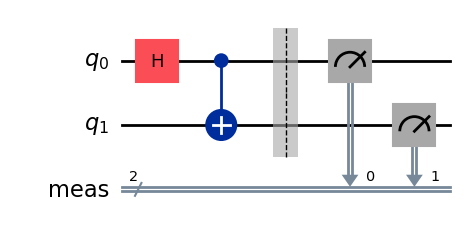

In [2]:
qc = qiskit.QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()
qc.draw("mpl")

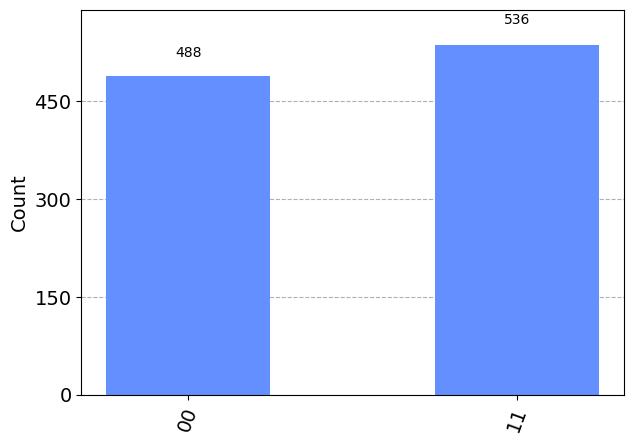

In [3]:
backend = BasicSimulator()
tqc = qiskit.transpile(qc, backend)
counts = backend.run(tqc).result().get_counts()
plot_histogram(counts)

In [5]:

service = QiskitRuntimeService()
backend = service.least_busy(min_num_qubits=3)
# print(backend.num_qubits)
sampler = Sampler(backend=backend)

C:\Users\abhig\AppData\Local\Temp\ipykernel_10864\1298708685.py:4: DeprecationWarning: The Sampler and Estimator V1 primitives have been deprecated as of qiskit-ibm-runtime 0.23.0 and will be removed no sooner than 3 months after the release date. Please use the V2 Primitives. See the `V2 migration guide <https://docs.quantum.ibm.com/api/migration-guides/v2-primitives>`_. for more details
  sampler = Sampler(backend=backend)


In [6]:
job = sampler.run(qc)
result = job.result()

d:\Backup Code\Code\Qiskit\qiskit_env\Lib\site-packages\qiskit_ibm_runtime\qiskit_runtime_service.py:879: UserWarning: Cloud simulators have been deprecated and will be removed on 15 May 2024. Use the new local testing mode in qiskit-ibm-runtime version 0.22.0 or later to meet your debugging needs.
  warnings.warn(warning_message)


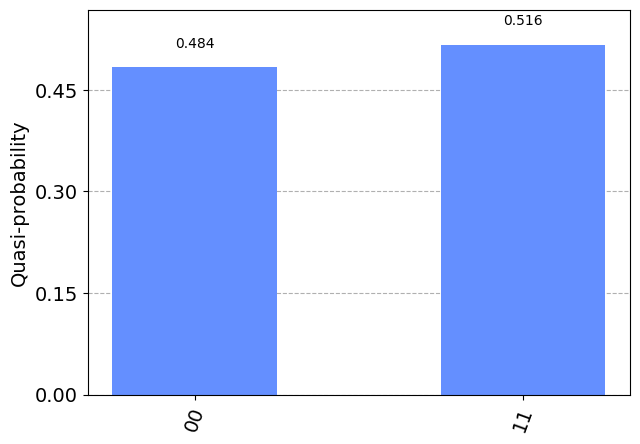

In [7]:
counts = result.quasi_dists[0].binary_probabilities()
plot_histogram(counts)